In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sample_data.csv")

In [9]:
df['y_hat_20_03'] = 20 + 0.3*df['Marketing']

In [10]:
print(df[['Marketing', 'Profit', 'y_hat_20_03']])

    Marketing  Profit  y_hat_20_03
0         472     192        161.6
1         444     192        153.2
2         408     191        142.4
3         383     183        134.9
4         366     166        129.8
5         363     157        128.9
6         128     156         58.4
7         324     156        117.2
8         312     152        113.6
9         305     150        111.5
10        229     146         88.7
11        250     144         95.0
12        250     142         95.0
13        253     134         95.9
14        257     133         97.1
15        262     130         98.6
16        264     127         99.2
17        283     125        104.9
18        295     124        108.5
19          0     123         20.0
20        299     118        109.7
21        300     111        110.0
22        303     110        110.9
23        305     109        111.5
24        141     109         62.3
25        138     107         61.4
26        134     106         60.2
27        353     10

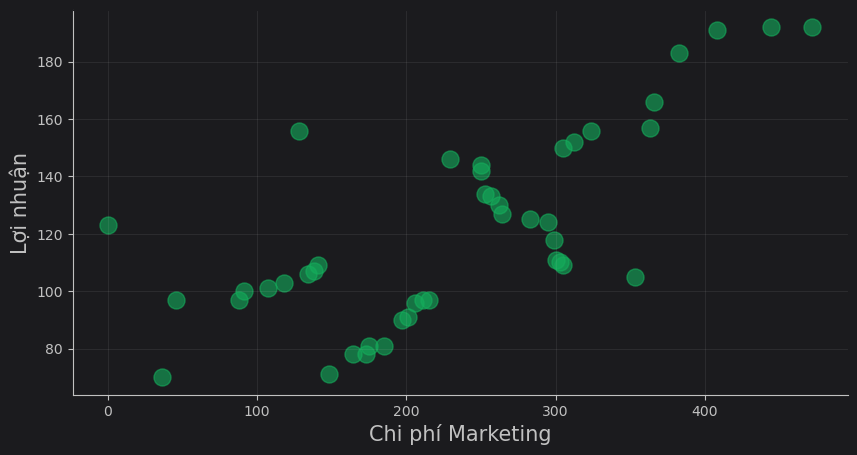

In [99]:
# Draw scatter plot
background_color = '#1B1B1E'
text_color = '#C1C1C1'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

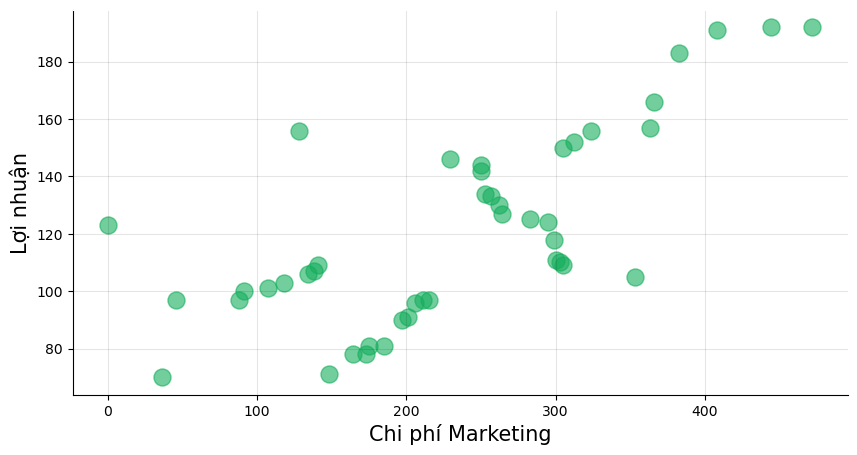

In [103]:
# Draw scatter plot
background_color = 'white'
text_color = 'black'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

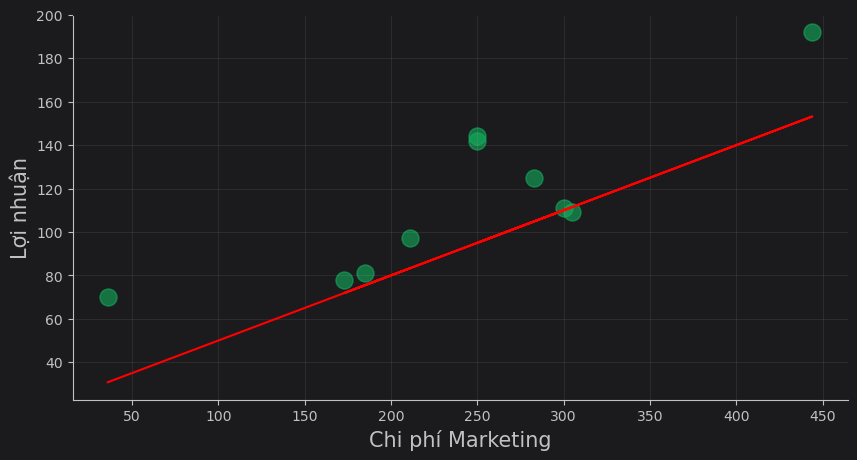

In [30]:
sample_df = df.sample(10)

# Draw scatter plot
background_color = '#1B1B1E'
text_color = '#C1C1C1'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = sample_df['Marketing'],    # Trục x
    y = sample_df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

plt.plot(
    sample_df['Marketing'],
    sample_df['y_hat_20_03'],
    color = 'red'
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)